In [ ]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.6/779.6 kB 8.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%cd /content/drive/MyDrive/OBJECT DETECTION

/content/drive/MyDrive/OBJECT DETECTION


In [5]:
!ls


'OBJECT DETECTION - ID'   Yolov8.ipynb


In [7]:
from ultralytics import YOLO
import cv2
import yaml
import os
import torch
from pathlib import Path

dataset_root = "/content/drive/MyDrive/OBJECT DETECTION/OBJECT DETECTION - ID"

class_map = {0:"ID-detected", 1:"NO ID"}
classes = ["ID-detected","NO ID"]

model = YOLO("yolov8n.pt")
yolo_yaml = {'path': dataset_root,
    'train': os.path.join(dataset_root, "train", "images"),
    'val': os.path.join(dataset_root, "valid", "images"),
    'test': os.path.join(dataset_root, "test", "images"),
            # Classes
            'names' : {
              0: 'ID-detected',
              1: 'NO ID'}
            }

with open(os.path.join("/content/drive/MyDrive/OBJECT DETECTION/OBJECT DETECTION - ID", 'data.yaml'), 'w+') as file:
    yaml.dump(yolo_yaml, file)

model.train(data=os.path.join(dataset_root, 'data.yaml'), epochs=25, batch=32, imgsz=640, name='Training with larger dataset YOLOV8')

Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/OBJECT DETECTION/OBJECT DETECTION - ID/data.yaml, epochs=25, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=Training with larger dataset YOLOV8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False

100%|██████████| 755k/755k [00:00<00:00, 24.0MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/OBJECT DETECTION/OBJECT DETECTION - ID/train/labels... 230 images, 0 backgrounds, 0 corrupt: 100%|██████████| 230/230 [01:57<00:00,  1.96it/s]

train: New cache created: /content/drive/MyDrive/OBJECT DETECTION/OBJECT DETECTION - ID/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/OBJECT DETECTION/OBJECT DETECTION - ID/valid/labels... 25 images, 0 backgrounds, 0 corrupt: 100%|██████████| 25/25 [00:25<00:00,  1.01s/it]

val: New cache created: /content/drive/MyDrive/OBJECT DETECTION/OBJECT DETECTION - ID/valid/labels.cache


Plotting labels to runs/detect/Training with larger dataset YOLOV8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/Training with larger dataset YOLOV8
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.19G      2.829      4.102       2.55         32        640: 100%|██████████| 8/8 [00:10<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.04s/it]

                   all         25         86    0.00209      0.174    0.00851     0.0025



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      4.36G       2.46      3.645      2.155         22        640: 100%|██████████| 8/8 [00:03<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

                   all         25         86    0.00394       0.36     0.0544     0.0276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      4.39G      2.259      3.079      1.986         24        640: 100%|██████████| 8/8 [00:04<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]

                   all         25         86    0.00313      0.244     0.0228    0.00741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      4.48G      2.194      2.724      1.913         52        640: 100%|██████████| 8/8 [00:02<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.95it/s]

                   all         25         86      0.778     0.0465     0.0677     0.0271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      4.47G      2.074      2.613      1.835         30        640: 100%|██████████| 8/8 [00:02<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.54it/s]

                   all         25         86      0.693     0.0369     0.0706     0.0216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      4.41G      2.116      2.556      1.862         28        640: 100%|██████████| 8/8 [00:03<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.34it/s]

                   all         25         86      0.866     0.0349     0.0631     0.0225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      4.42G      2.105      2.513      1.865         30        640: 100%|██████████| 8/8 [00:04<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

                   all         25         86      0.575     0.0698     0.0383     0.0147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      4.42G      2.012      2.405      1.749         24        640: 100%|██████████| 8/8 [00:02<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

                   all         25         86      0.571     0.0814     0.0483     0.0196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      4.47G       1.92       2.24      1.672         38        640: 100%|██████████| 8/8 [00:02<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         25         86      0.647      0.073      0.105     0.0495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      4.48G      1.954      2.242      1.683         40        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]

                   all         25         86      0.191       0.14      0.109     0.0411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      4.48G      1.904      2.257      1.691         49        640: 100%|██████████| 8/8 [00:02<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]

                   all         25         86      0.222      0.244      0.158     0.0605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      4.46G      1.942      2.201      1.659         21        640: 100%|██████████| 8/8 [00:02<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

                   all         25         86      0.276      0.279      0.173     0.0583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      4.42G      1.889      2.164      1.642         12        640: 100%|██████████| 8/8 [00:02<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]

                   all         25         86      0.161      0.274      0.135     0.0429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25       4.4G      1.863      2.149      1.651         13        640: 100%|██████████| 8/8 [00:04<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]

                   all         25         86      0.195      0.372      0.219     0.0824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      4.48G      1.779      2.026      1.608         25        640: 100%|██████████| 8/8 [00:02<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

                   all         25         86      0.635      0.209      0.209      0.085


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      4.84G      1.872      2.118      1.672         18        640: 100%|██████████| 8/8 [00:08<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all         25         86      0.231      0.291      0.191       0.07



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      4.42G      1.833      1.988      1.643         24        640: 100%|██████████| 8/8 [00:04<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

                   all         25         86      0.353      0.384      0.302      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      4.42G      1.794      1.919      1.611         26        640: 100%|██████████| 8/8 [00:02<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

                   all         25         86      0.305      0.371      0.309     0.0924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      4.47G      1.764      1.837      1.582         33        640: 100%|██████████| 8/8 [00:02<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.49it/s]

                   all         25         86      0.631      0.314      0.402      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      4.42G      1.727      1.785      1.539         19        640: 100%|██████████| 8/8 [00:03<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]

                   all         25         86      0.534      0.465      0.476      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      4.45G      1.713      1.719      1.551         17        640: 100%|██████████| 8/8 [00:02<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]

                   all         25         86      0.528      0.477      0.516       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      4.47G      1.672      1.674      1.503         19        640: 100%|██████████| 8/8 [00:02<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

                   all         25         86      0.599       0.48        0.5      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      4.42G      1.594      1.653      1.469         21        640: 100%|██████████| 8/8 [00:02<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.82it/s]

                   all         25         86       0.54      0.491      0.478      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      4.47G       1.57      1.571      1.428         22        640: 100%|██████████| 8/8 [00:03<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.51it/s]

                   all         25         86      0.491      0.521      0.508      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      4.47G       1.49      1.519      1.418         12        640: 100%|██████████| 8/8 [00:03<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.16it/s]

                   all         25         86      0.547      0.477      0.522       0.22



25 epochs completed in 0.044 hours.
Optimizer stripped from runs/detect/Training with larger dataset YOLOV8/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/Training with larger dataset YOLOV8/weights/best.pt, 6.2MB

Validating runs/detect/Training with larger dataset YOLOV8/weights/best.pt...
Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.38it/s]


                   all         25         86      0.569       0.47      0.522       0.22
           ID-detected         21         43      0.492      0.558      0.544      0.278
                 NO ID         12         43      0.646      0.382        0.5      0.162
Speed: 0.2ms preprocess, 2.2ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/Training with larger dataset YOLOV8


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b65dc4d06d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

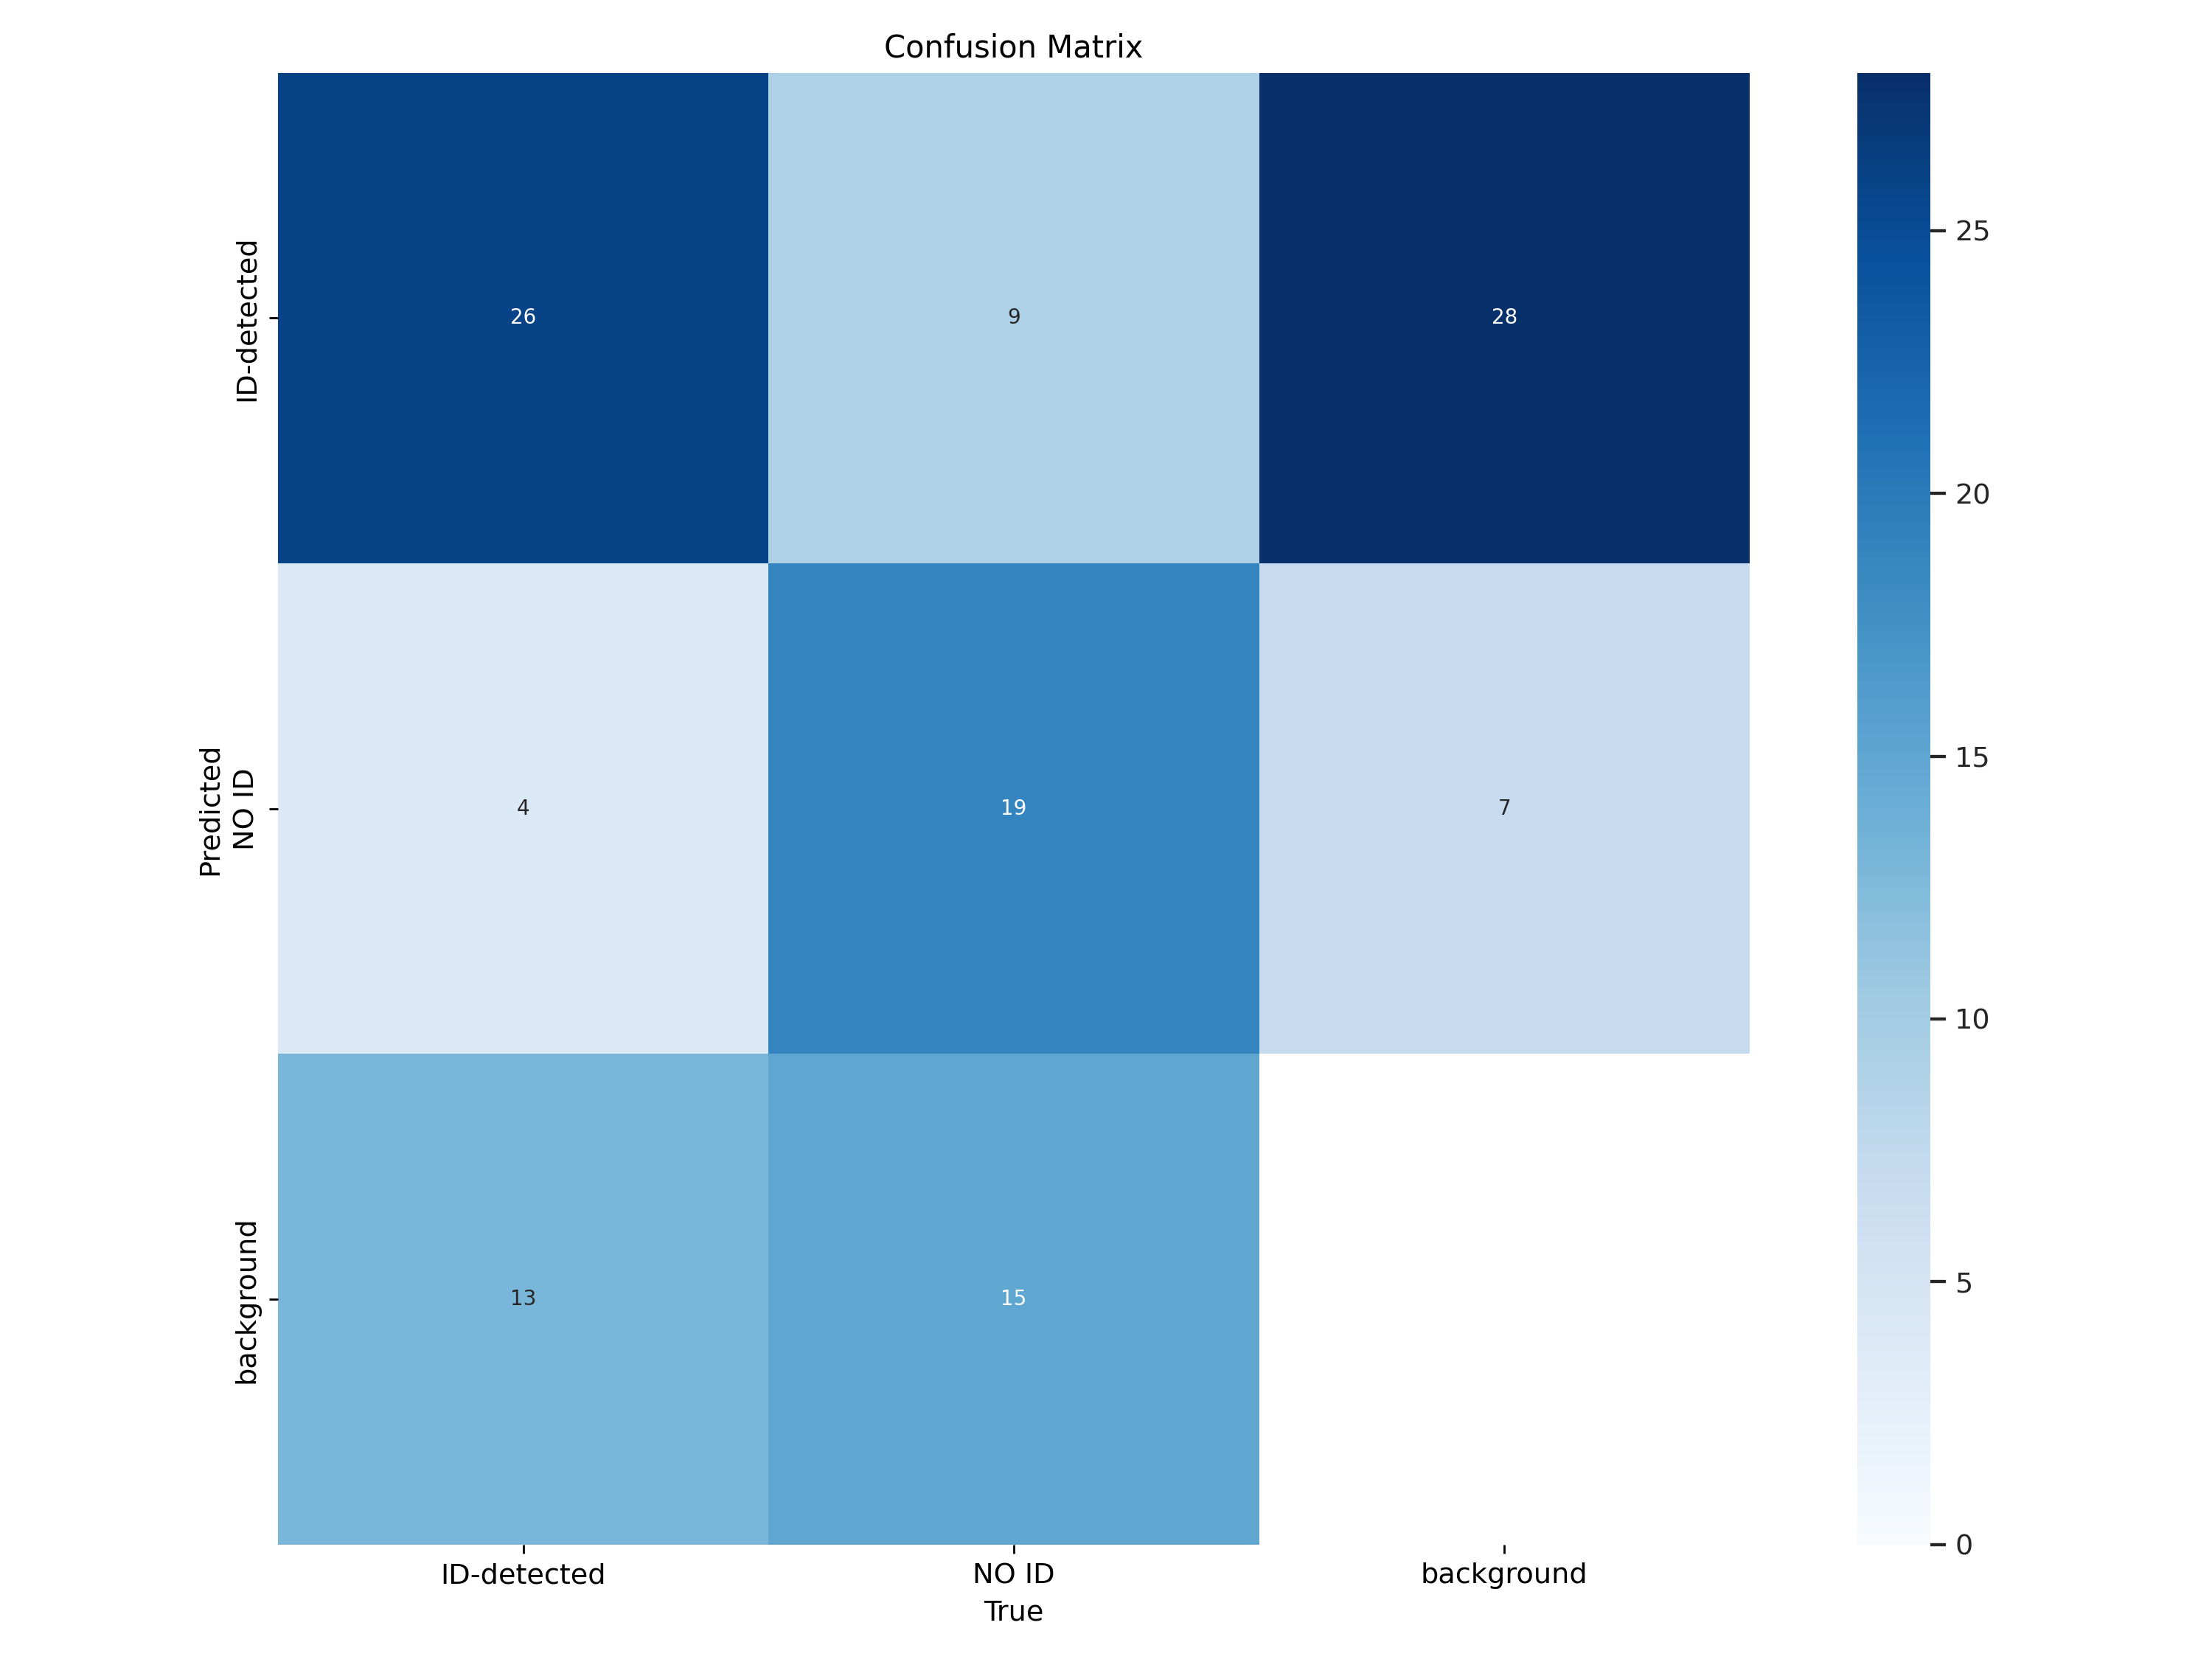

In [15]:
from IPython.display import Image

# Display the image
Image(filename='/content/drive/MyDrive/OBJECT DETECTION/runs/detect/Training with larger dataset YOLOV8/confusion_matrix.png', width=600)


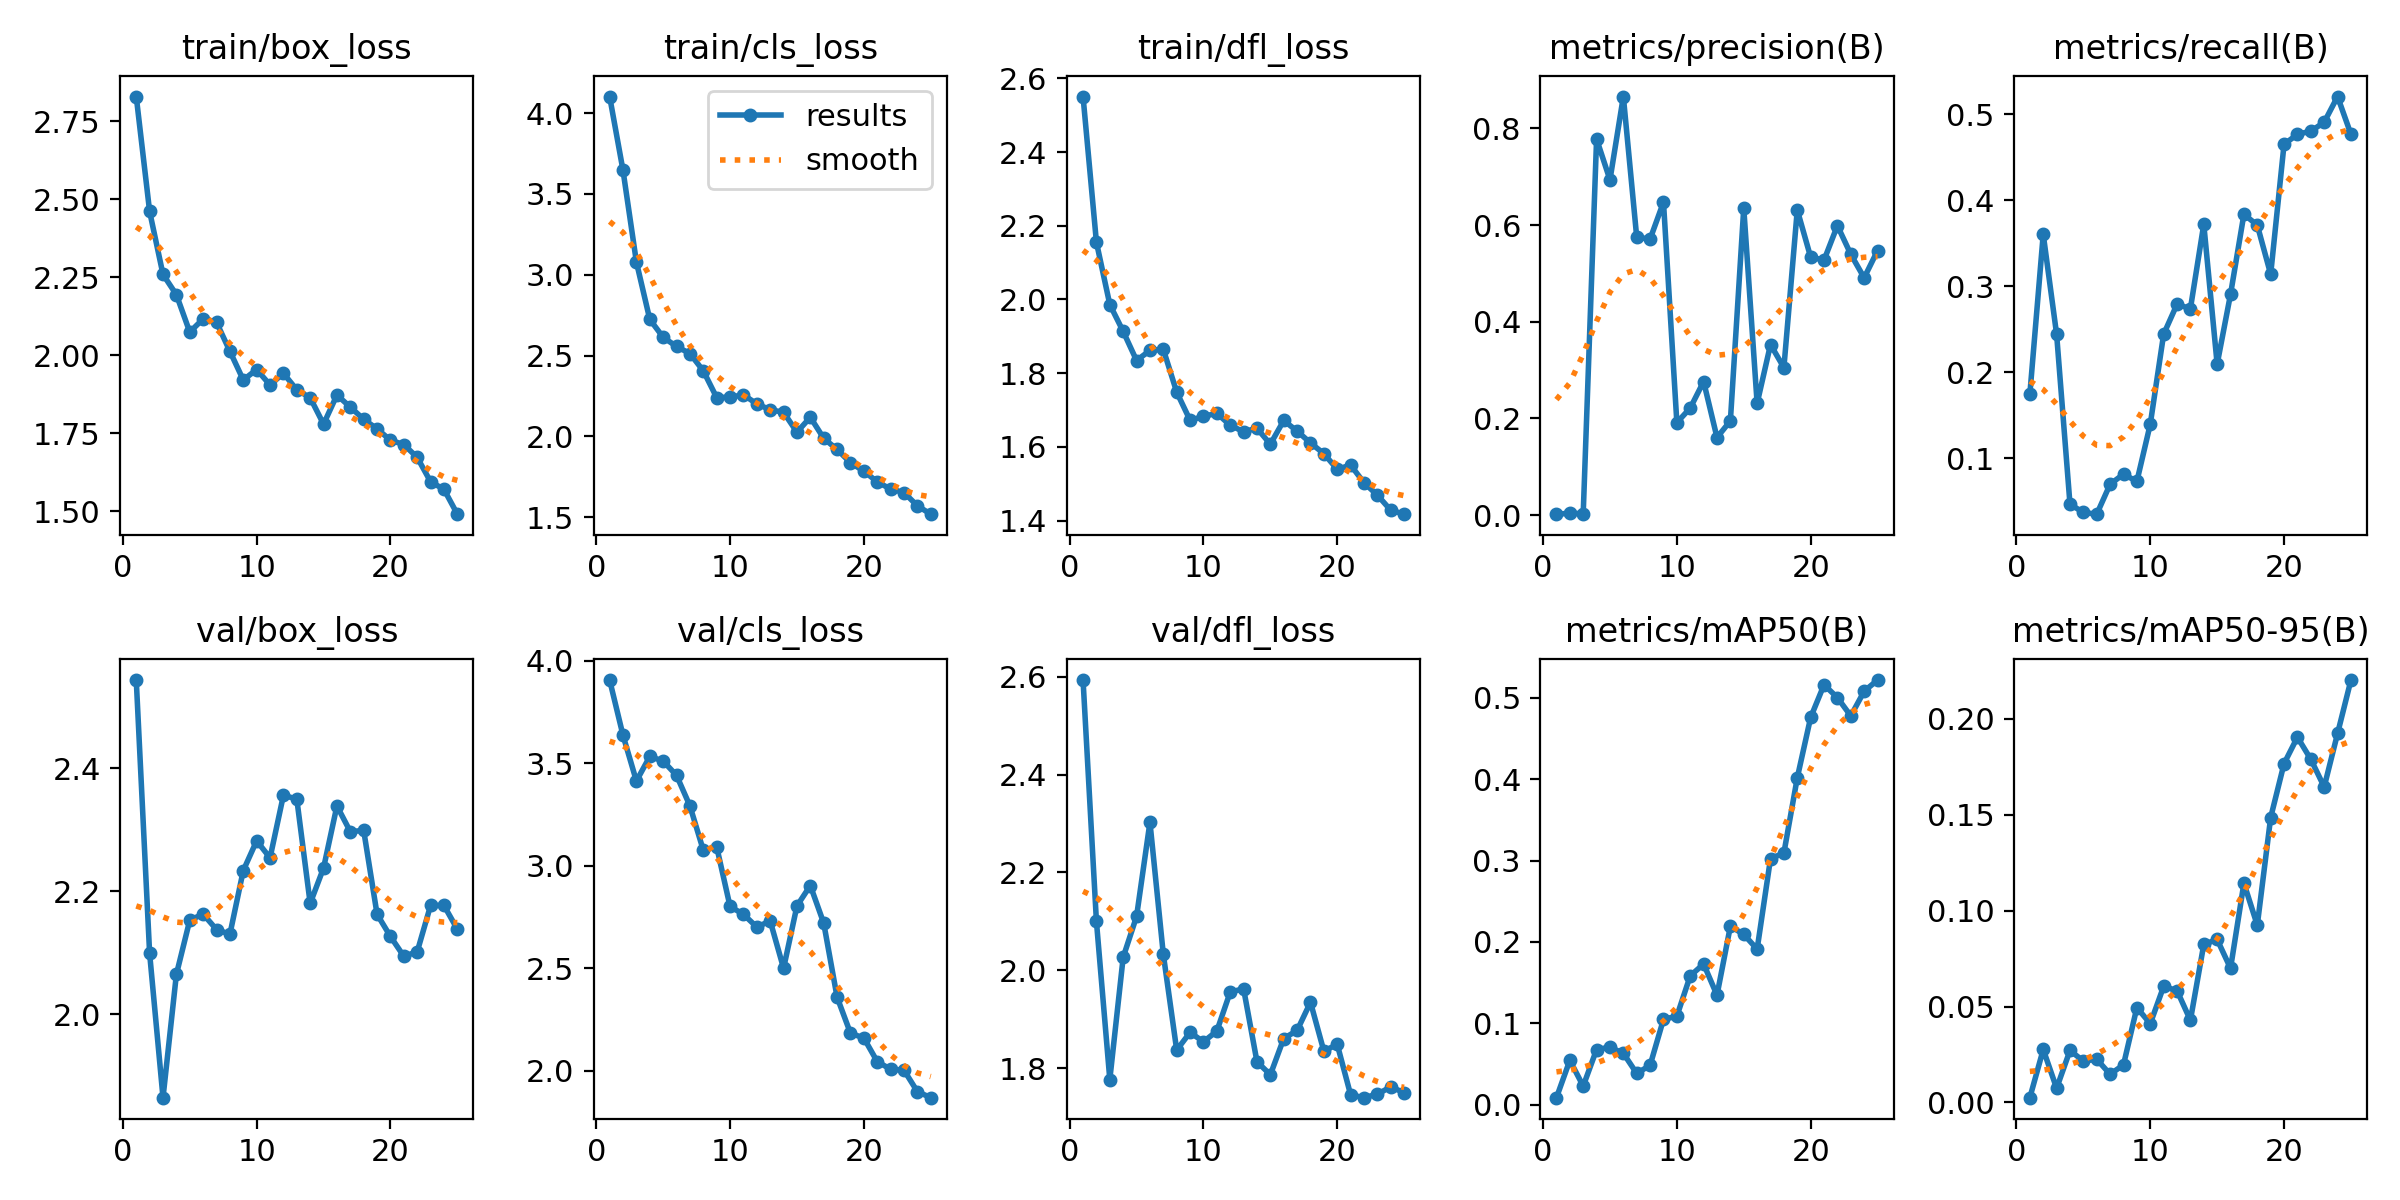

In [16]:
Image(filename='/content/drive/MyDrive/OBJECT DETECTION/runs/detect/Training with larger dataset YOLOV8/results.png', width=600)


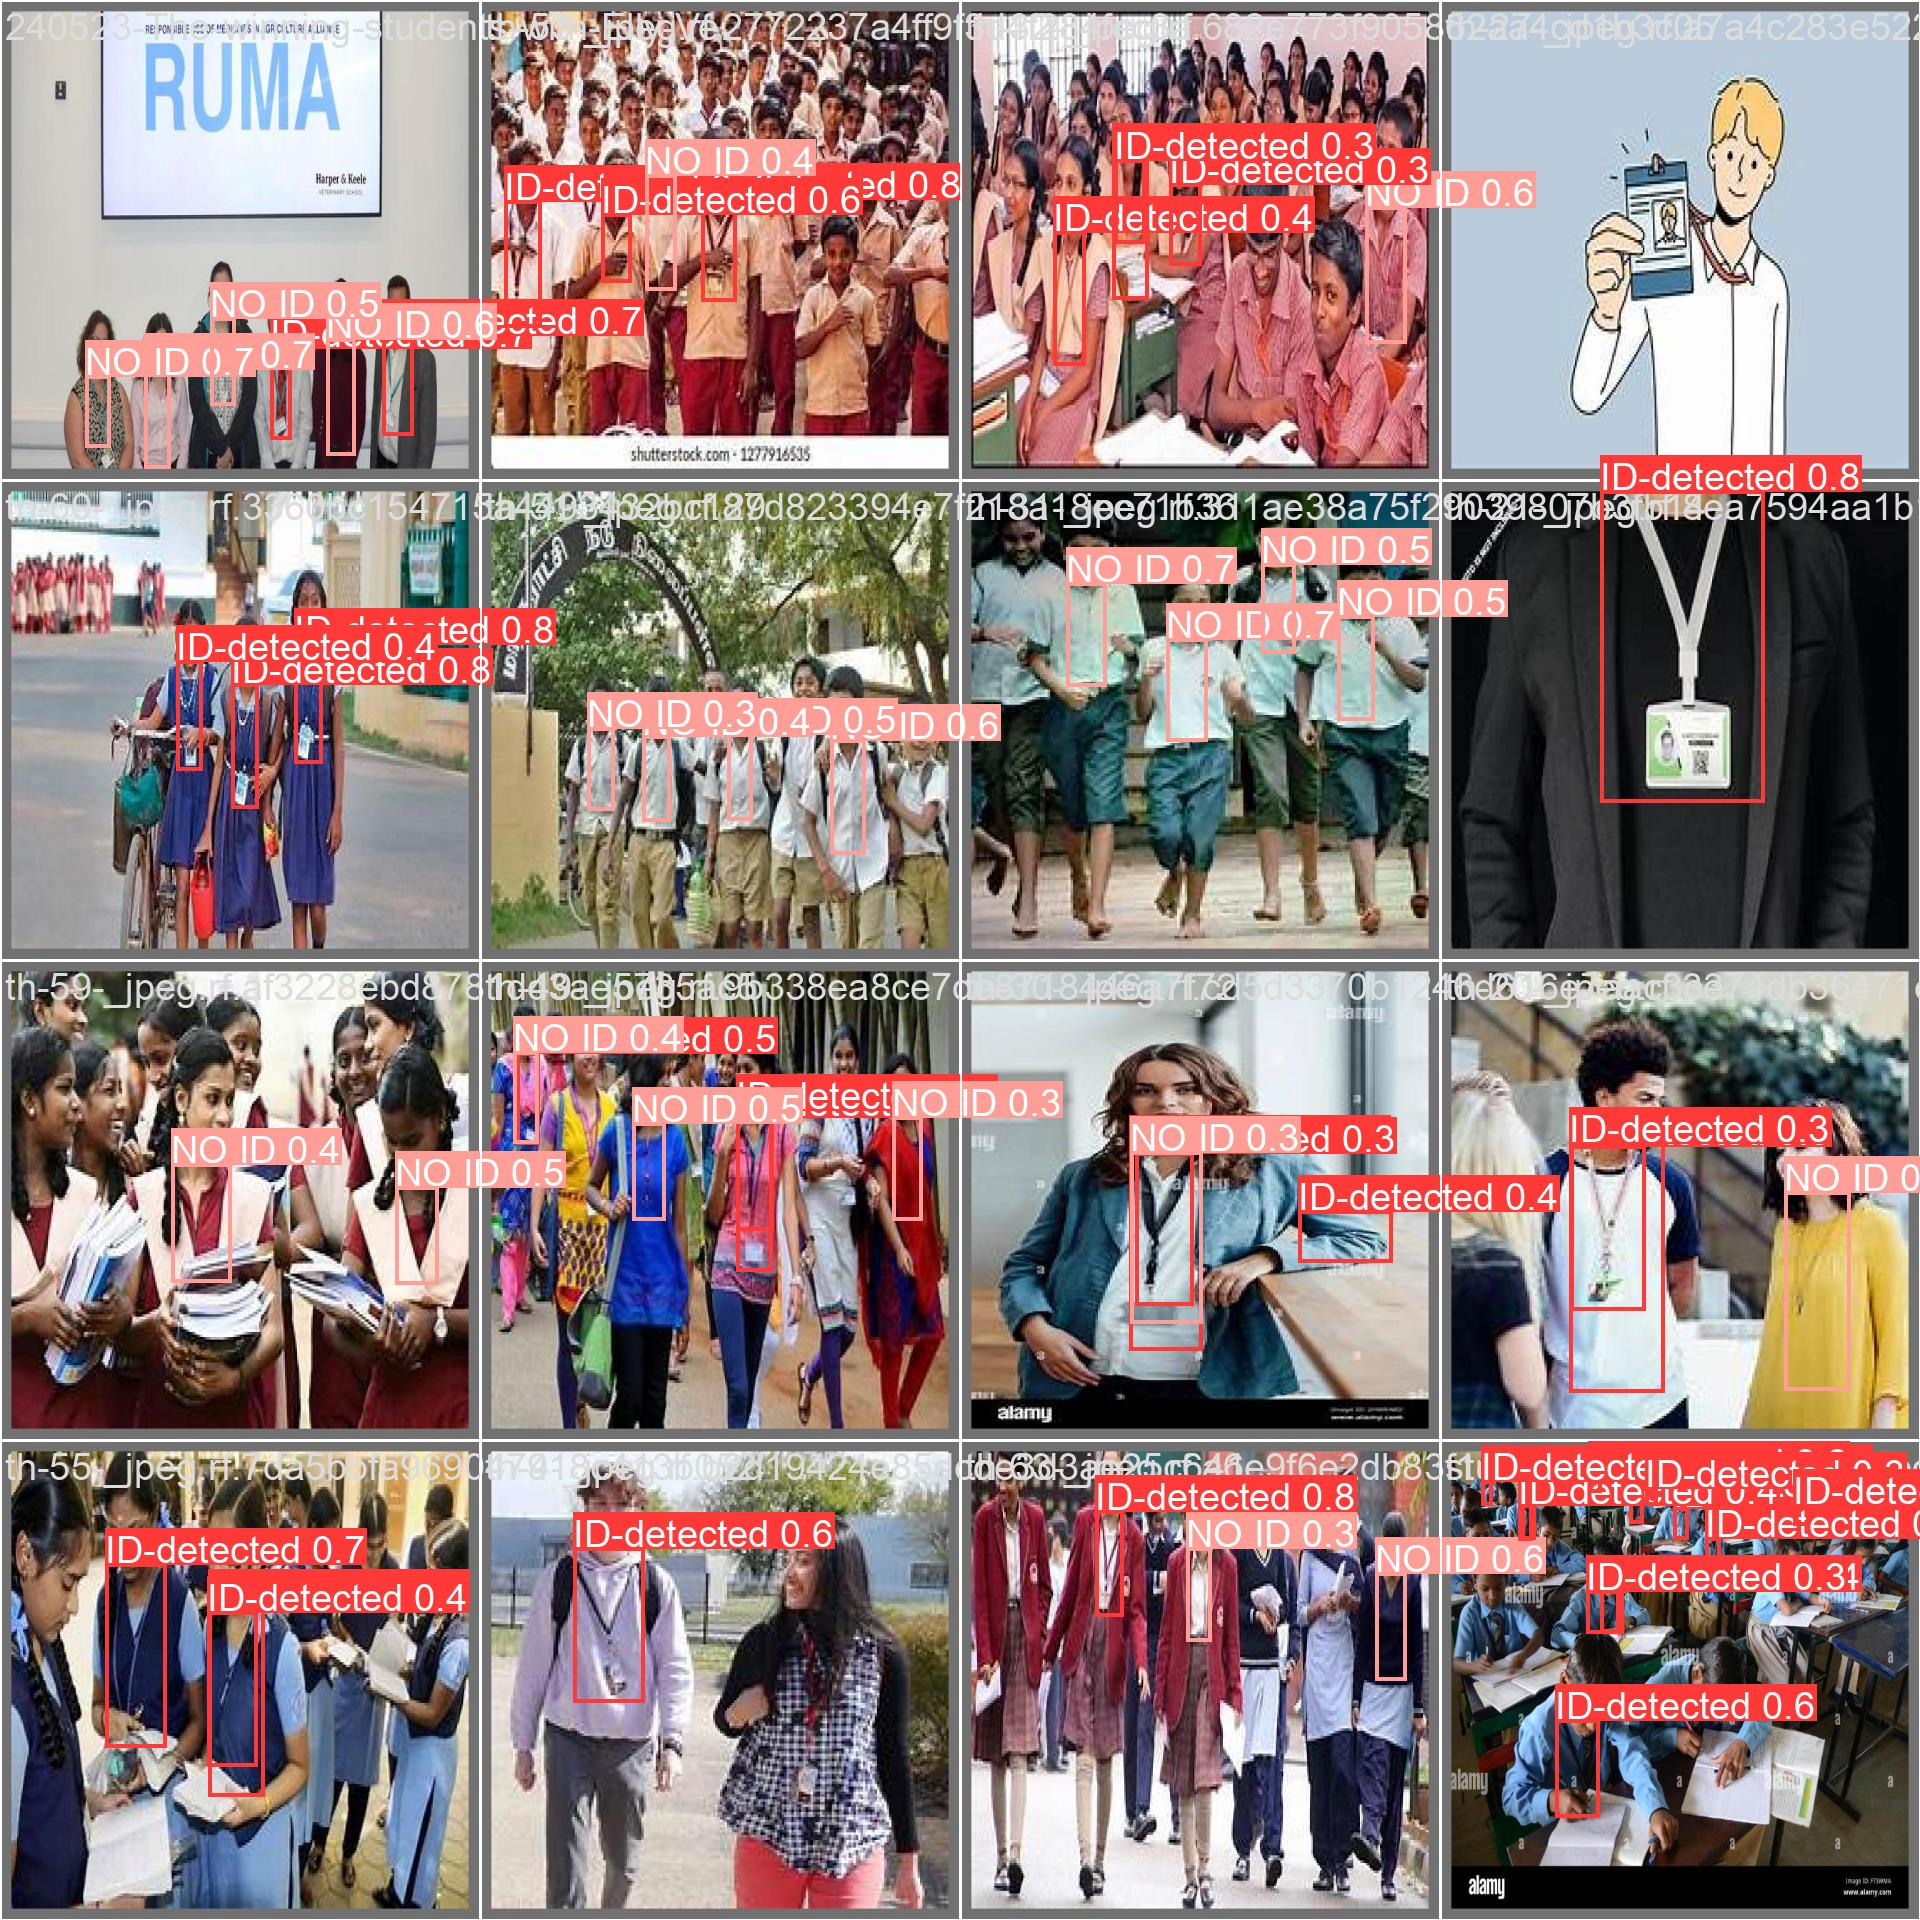

In [17]:
Image(filename='/content/drive/MyDrive/OBJECT DETECTION/runs/detect/Training with larger dataset YOLOV8/val_batch0_pred.jpg', width=600)


0: 640x640 1 ID-detected, 1 NO ID, 9.9ms
Speed: 1.7ms preprocess, 9.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'ID-detected', 1: 'NO ID'}
obb: None
orig_img: array([[[  1, 138, 190],
        [  0, 132, 184],
        [  0, 135, 187],
        ...,
        [  7,   7,   5],
        [  7,   7,   5],
        [  7,   7,   5]],

       [[  3, 140, 192],
        [  0, 134, 186],
        [  1, 138, 190],
        ...,
        [  7,   7,   5],
        [  7,   7,   5],
        [  7,   7,   5]],

       [[  2, 140, 189],
        [  0, 135, 184],
        [  1, 137, 187],
        ...,
        [  7,   7,   5],
        [  7,   7,   5],
        [  7,   7,   5]],

       ...,

       [[202, 244, 255],
        [200, 242, 255],
        [183, 227, 240],
        ...,
        [ 26, 118, 139],
        [ 51, 139, 159],
        [ 56, 144, 164]

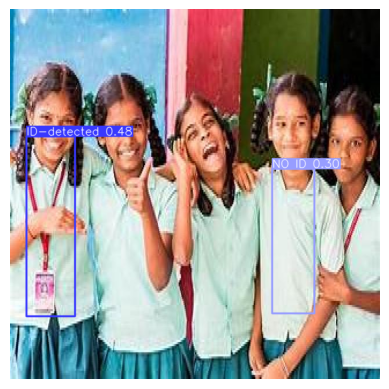


0: 640x640 5 ID-detecteds, 7 NO IDs, 9.4ms
Speed: 2.0ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'ID-detected', 1: 'NO ID'}
obb: None
orig_img: array([[[ 99,  77,  64],
        [ 95,  73,  60],
        [ 90,  68,  55],
        ...,
        [127,  96,  68],
        [129,  98,  70],
        [127,  96,  68]],

       [[ 83,  61,  48],
        [ 81,  59,  46],
        [ 78,  56,  43],
        ...,
        [124,  93,  65],
        [125,  94,  66],
        [122,  91,  63]],

       [[ 70,  51,  37],
        [ 69,  50,  36],
        [ 67,  48,  34],
        ...,
        [121,  90,  62],
        [120,  89,  61],
        [117,  86,  58]],

       ...,

       [[ 14, 119, 174],
        [ 14, 119, 174],
        [ 14, 119, 174],
        ...,
        [ 14, 119, 176],
        [ 14, 119, 176],
        [ 14, 119, 17

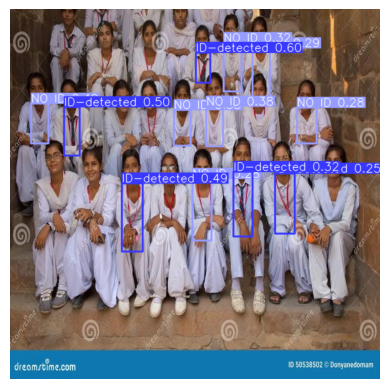

In [33]:

# Import the necessary libraries
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load the trained YOLOv8 model
model = YOLO('/content/drive/MyDrive/OBJECT DETECTION/runs/detect/Training with larger dataset YOLOV8/weights/best.pt')  # Replace with your model's path

# Function to test and visualize results on an image
def test_image(image_path, model):
    # Read the image
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Run inference
    results = model(img_rgb)

    # Iterate over the results
    for result in results:
        # Print the results
        print(result)

        # Plot the results
        annotated_img = result.plot()
        plt.imshow(annotated_img)
        plt.axis('off')
        plt.show()

# Path to the image you want to test
image_path = '/content/drive/MyDrive/OBJECT DETECTION/OBJECT DETECTION - ID/test/images/th-36-_jpeg.rf.836b0e6c33c707cd342fe7481bb91c6b.jpg'
output= "/content/drive/MyDrive/OBJECT DETECTION/OBJECT DETECTION - ID/test/images/indian-school-girls-sitting-qutub-minar-delhi-india-uniforms-complex-50538502_webp.rf.e990d1b23ffea60dbfba09e780eefc8c.jpg"
# Test the image
test_image(image_path, model)
test_image(output, model)

